<a href="https://colab.research.google.com/github/magaramol/Logistic-Regression-Implementation/blob/main/DT_verma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the dataset
data = load_iris()
X = data.data
y = data.target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize the Decision Tree Classifier
# You can tune hyperparameters like max_depth, min_samples_split, etc.
clf = DecisionTreeClassifier(random_state=42)

# Step 4: Train the model
clf.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = clf.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [2]:
# pip install graphviz pydotplus


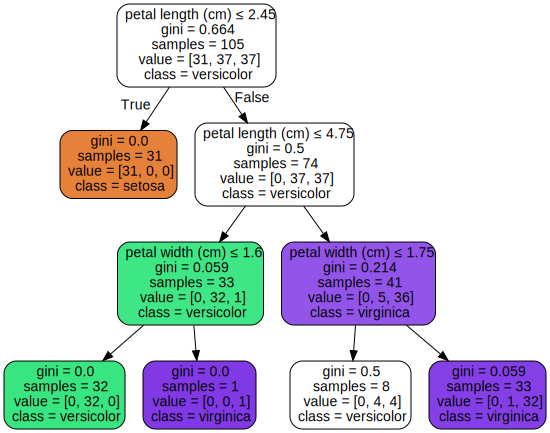

In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import graphviz
import pydotplus
from IPython.display import Image

# Load the dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree model
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Export the tree to DOT format
dot_data = export_graphviz(
    clf,
    out_file=None,  # Output as a string, not a file
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True,     # Colors the nodes
    rounded=True,    # Rounds the node edges
    special_characters=True
)

# Use graphviz to display the DOT format
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # This saves the tree as a .pdf file named "decision_tree"

# Display the tree inline (for Jupyter or IPython environments)
graph


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [None, 3, 5, 10],               # Try different depths
    'min_samples_split': [2, 5, 10],             # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],               # Minimum samples in a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider for best split
    'criterion': ['gini', 'entropy']             # Splitting criteria
}

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Set up the grid search with cross-validation
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=5,                      # 5-fold cross-validation
    n_jobs=-1,                 # Use all available cores
    scoring='accuracy'         # Optimize for accuracy
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_clf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
y_pred = best_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", test_accuracy)


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.9333333333333333
Test Set Accuracy: 0.9777777777777777


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
187 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [None, 3, 5, 10],               # Try different depths
    'min_samples_split': [2, 5, 10],             # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],               # Minimum samples in a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider for best split
    'criterion': ['gini', 'entropy']             # Splitting criteria
}

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Set up the grid search with cross-validation

param_grid = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],  # Removed 'auto'
    'criterion': ['gini', 'entropy']
}


# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Set up the grid search with the corrected parameter grid
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_clf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
y_pred = best_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", test_accuracy)


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.9428571428571428
Test Set Accuracy: 1.0
